# Documentation for PointCloud2Listener Module
### Author: Jose Rincon

__NOTE__:It is very important that you use Python2 as ROS currently does not support Python 3. <br> 
__Adding required packages to the module__

In [1]:
import rospy
from sensor_msgs.msg import Image
from sensor_msgs.msg import PointCloud2
from cv_bridge import CvBridge, CvBridgeError
import ros_numpy
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Class Definition ImageListener
__This class is described by: __<br>
1. __Constructor__:
    1. __x_coord_image__: X coordinate numpy array (coverted from CV2 data using ros_numpy)
    2. __y_coord_image__: Y coordinate numpy array (coverted from CV2 data using ros_numpy)
    3. __depth_coord_image__: Z coordinate numpy array (coverted from CV2 data using ros_numpy)
    4. __point_cloud_sub__: Instance of ROS topic subscriber
      

2. __Member Functions__:
    1. __callback__: this callback function is responsible for conversion of data to Cv2 types upon receving a new data from the PointCloud topic

In [2]:
class PointCloud2Listener:

    def __init__(self, topic):
        self.x_coord_image = None
        self.y_coord_image = None
        self.depth_coord_image = None
        self.point_cloud_sub = rospy.Subscriber(topic, PointCloud2, self.callback)

    def callback(self, data):
        try:
            pc = ros_numpy.numpify(data)
            self.x_coord_image = pc['x']
            self.y_coord_image = pc['y']
            self.depth_coord_image = pc['z']
        except CvBridgeError as e:
            print(e)

## Example: 

In [6]:
def main():
    point_cloud_listener = PointCloud2Listener('/camera/depth_registered/points')
    #Creates new object of type PointCloud2Listener. The ROS topic we wish to 
    #connect is ("/camera/depth_registered/points")
    rospy.init_node('realsensePointCloudNode', anonymous=True)
    #Initialize ROS node (This must be done only once)
    rospy.rostime.wallsleep(0.005)
    #ROS needs some time to chill before you want to retrieve more data
    x_coord_image = point_cloud_listener.x_coord_image
    #Retrieve X data from point-cloud
    y_coord_image = point_cloud_listener.y_coord_image
    #Retrieve Y data from point-cloud
    depth_image = point_cloud_listener.depth_coord_image
    #Retrieve Depth data from point-cloud
    depth_image_norm = cv2.normalize(depth_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX,
                                            dtype=cv2.CV_8UC1)
    #Normalize image (Just for visualization)

## Expected return:

In [ ]:
if __name__ == '__main__':
    main()

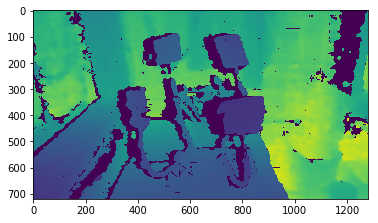

In [5]:
#plt.imshow(depth_image_norm)